# Introduction


This projects deals with data from 'Breast Cancer Wisconsin (Diagnostic) Data Set' from Kaggle. The main task is to make a model to classify data into Benign or Malignant. Some description of the data is provided from the data explanation in Kaggle.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 
1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.



# Importing packages and Data

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf

C:\Users\aradh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Importing Data

In [5]:
dt=pd.read_csv('C:\\python\\study\\dataset\\cancer\\data.csv')

# Exploring Data

In [6]:
dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We see 'id' and 'Unnamed: 32' is not very meaningful so we remove them.

In [79]:
X=dt.drop(columns=['id','Unnamed: 32'])

In [80]:
X.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing Data !!! Let us see how the distribution of Benign vs Malignant

In [81]:
X.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

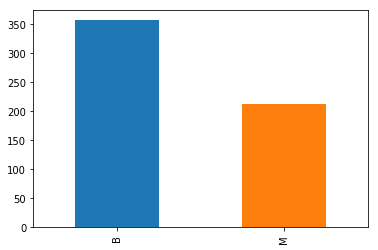

In [82]:
X.diagnosis.value_counts().plot.bar()

Much more data are Benign than Malignant

In [83]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [84]:
X.shape

(569, 31)

Let us explore features in Detail

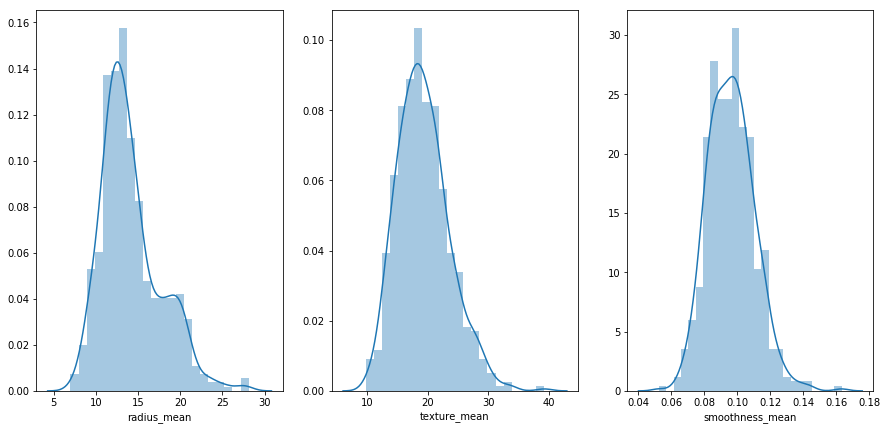

In [85]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.distplot(X.radius_mean)
plt.subplot(132)
sns.distplot(X.texture_mean)
plt.subplot(133)
sns.distplot(X.smoothness_mean)

I see there is a small hump in radius_mean. This might have to do with Malignant entries. Let's try to crosscheck

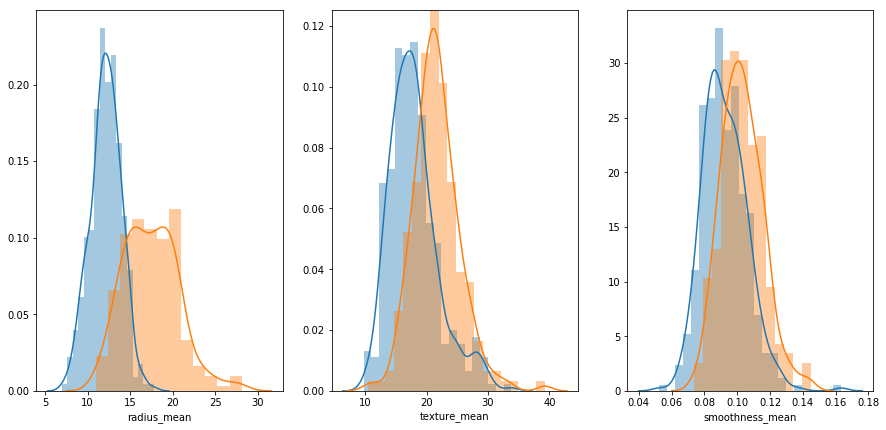

In [86]:
plt.figure(figsize=(15,7))
plt.subplot(131)
sns.distplot(X.loc[X.diagnosis=='B'].radius_mean)
sns.distplot(X.loc[X.diagnosis=='M'].radius_mean)
plt.subplot(132)
sns.distplot(X.loc[X.diagnosis=='B'].texture_mean)
sns.distplot(X.loc[X.diagnosis=='M'].texture_mean)
plt.subplot(133)
sns.distplot(X.loc[X.diagnosis=='B'].smoothness_mean)
sns.distplot(X.loc[X.diagnosis=='M'].smoothness_mean)

we see there is clear distinction in features based on being 'Benign' or malignant. 

we do this for all the columns.

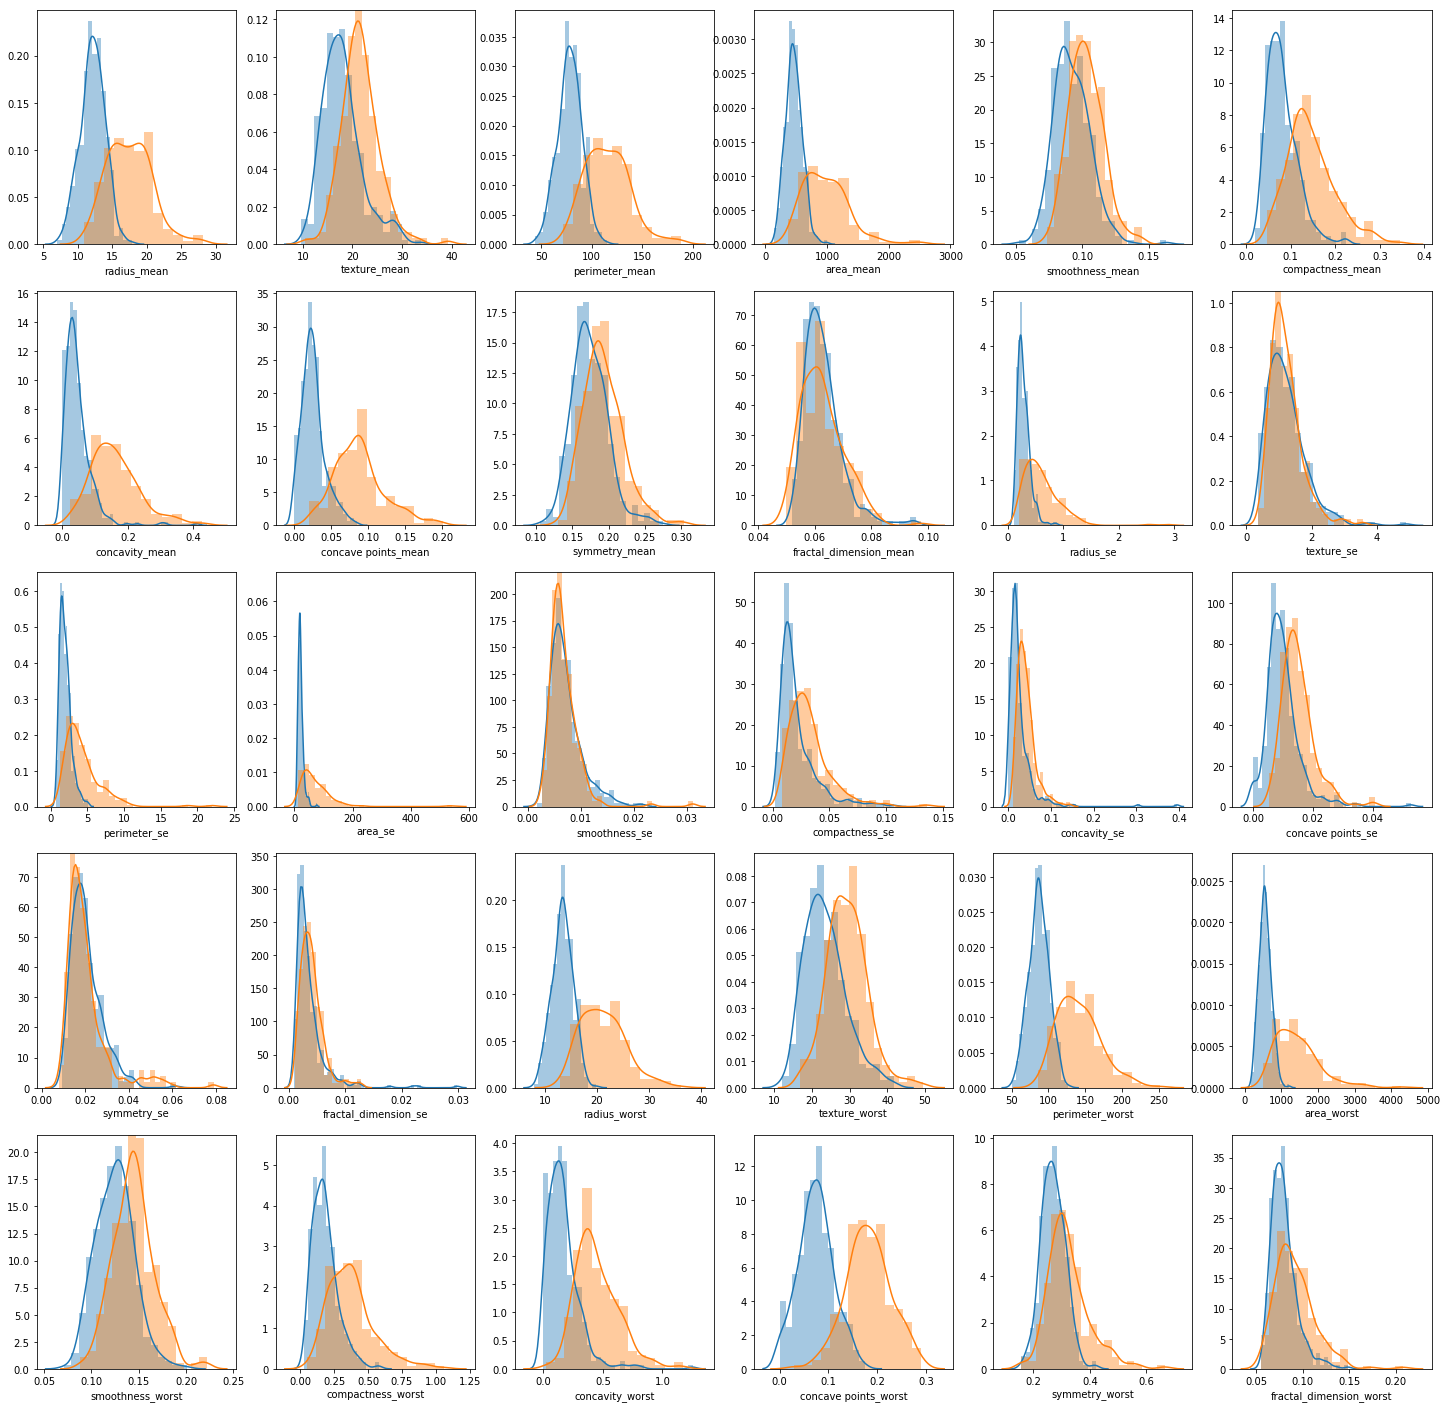

In [87]:
plt.figure(figsize=(25,25))
for i in range(1,len(X.columns)):
    plt.subplot(5,6,i)
    sns.distplot(X.loc[X.diagnosis=='B'].iloc[:,i])
    sns.distplot(X.loc[X.diagnosis=='M'].iloc[:,i])

We see for most of the features the distribution is separated for Benign and Malignant cells. This might indicate there are lot of features which might be correlated, it is obvious as  'area' is correlated to 'radius'. We might try to remove the redundant features. Let's try to find correlation.

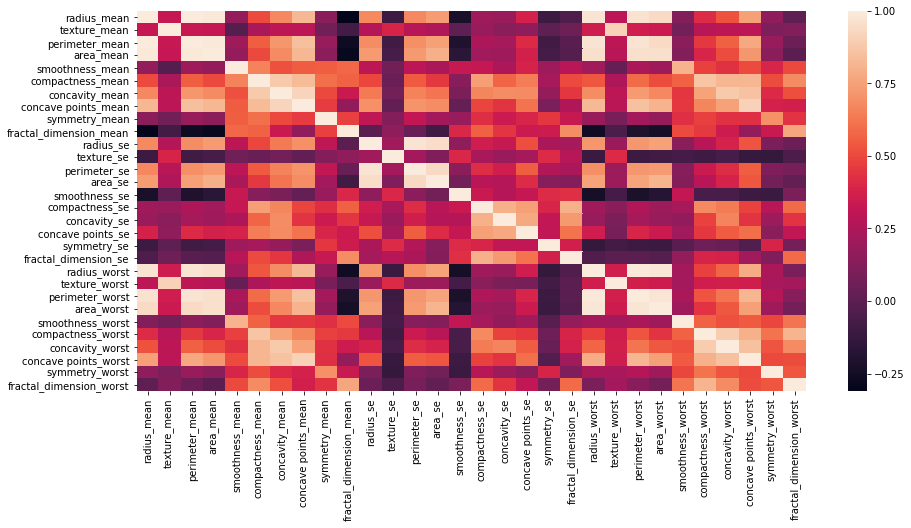

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(X.corr())

As expected area, radius, perimeter values are heavily correlated. We drop some of the correlated columns so that we can feed data to different models.

In [88]:
dr_lst=['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
        'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
        'compactness_se','concave points_se','texture_worst','area_worst']

In [89]:
X.drop(columns=dr_lst,inplace=True)

In [90]:
X.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [91]:
X.shape

(569, 17)

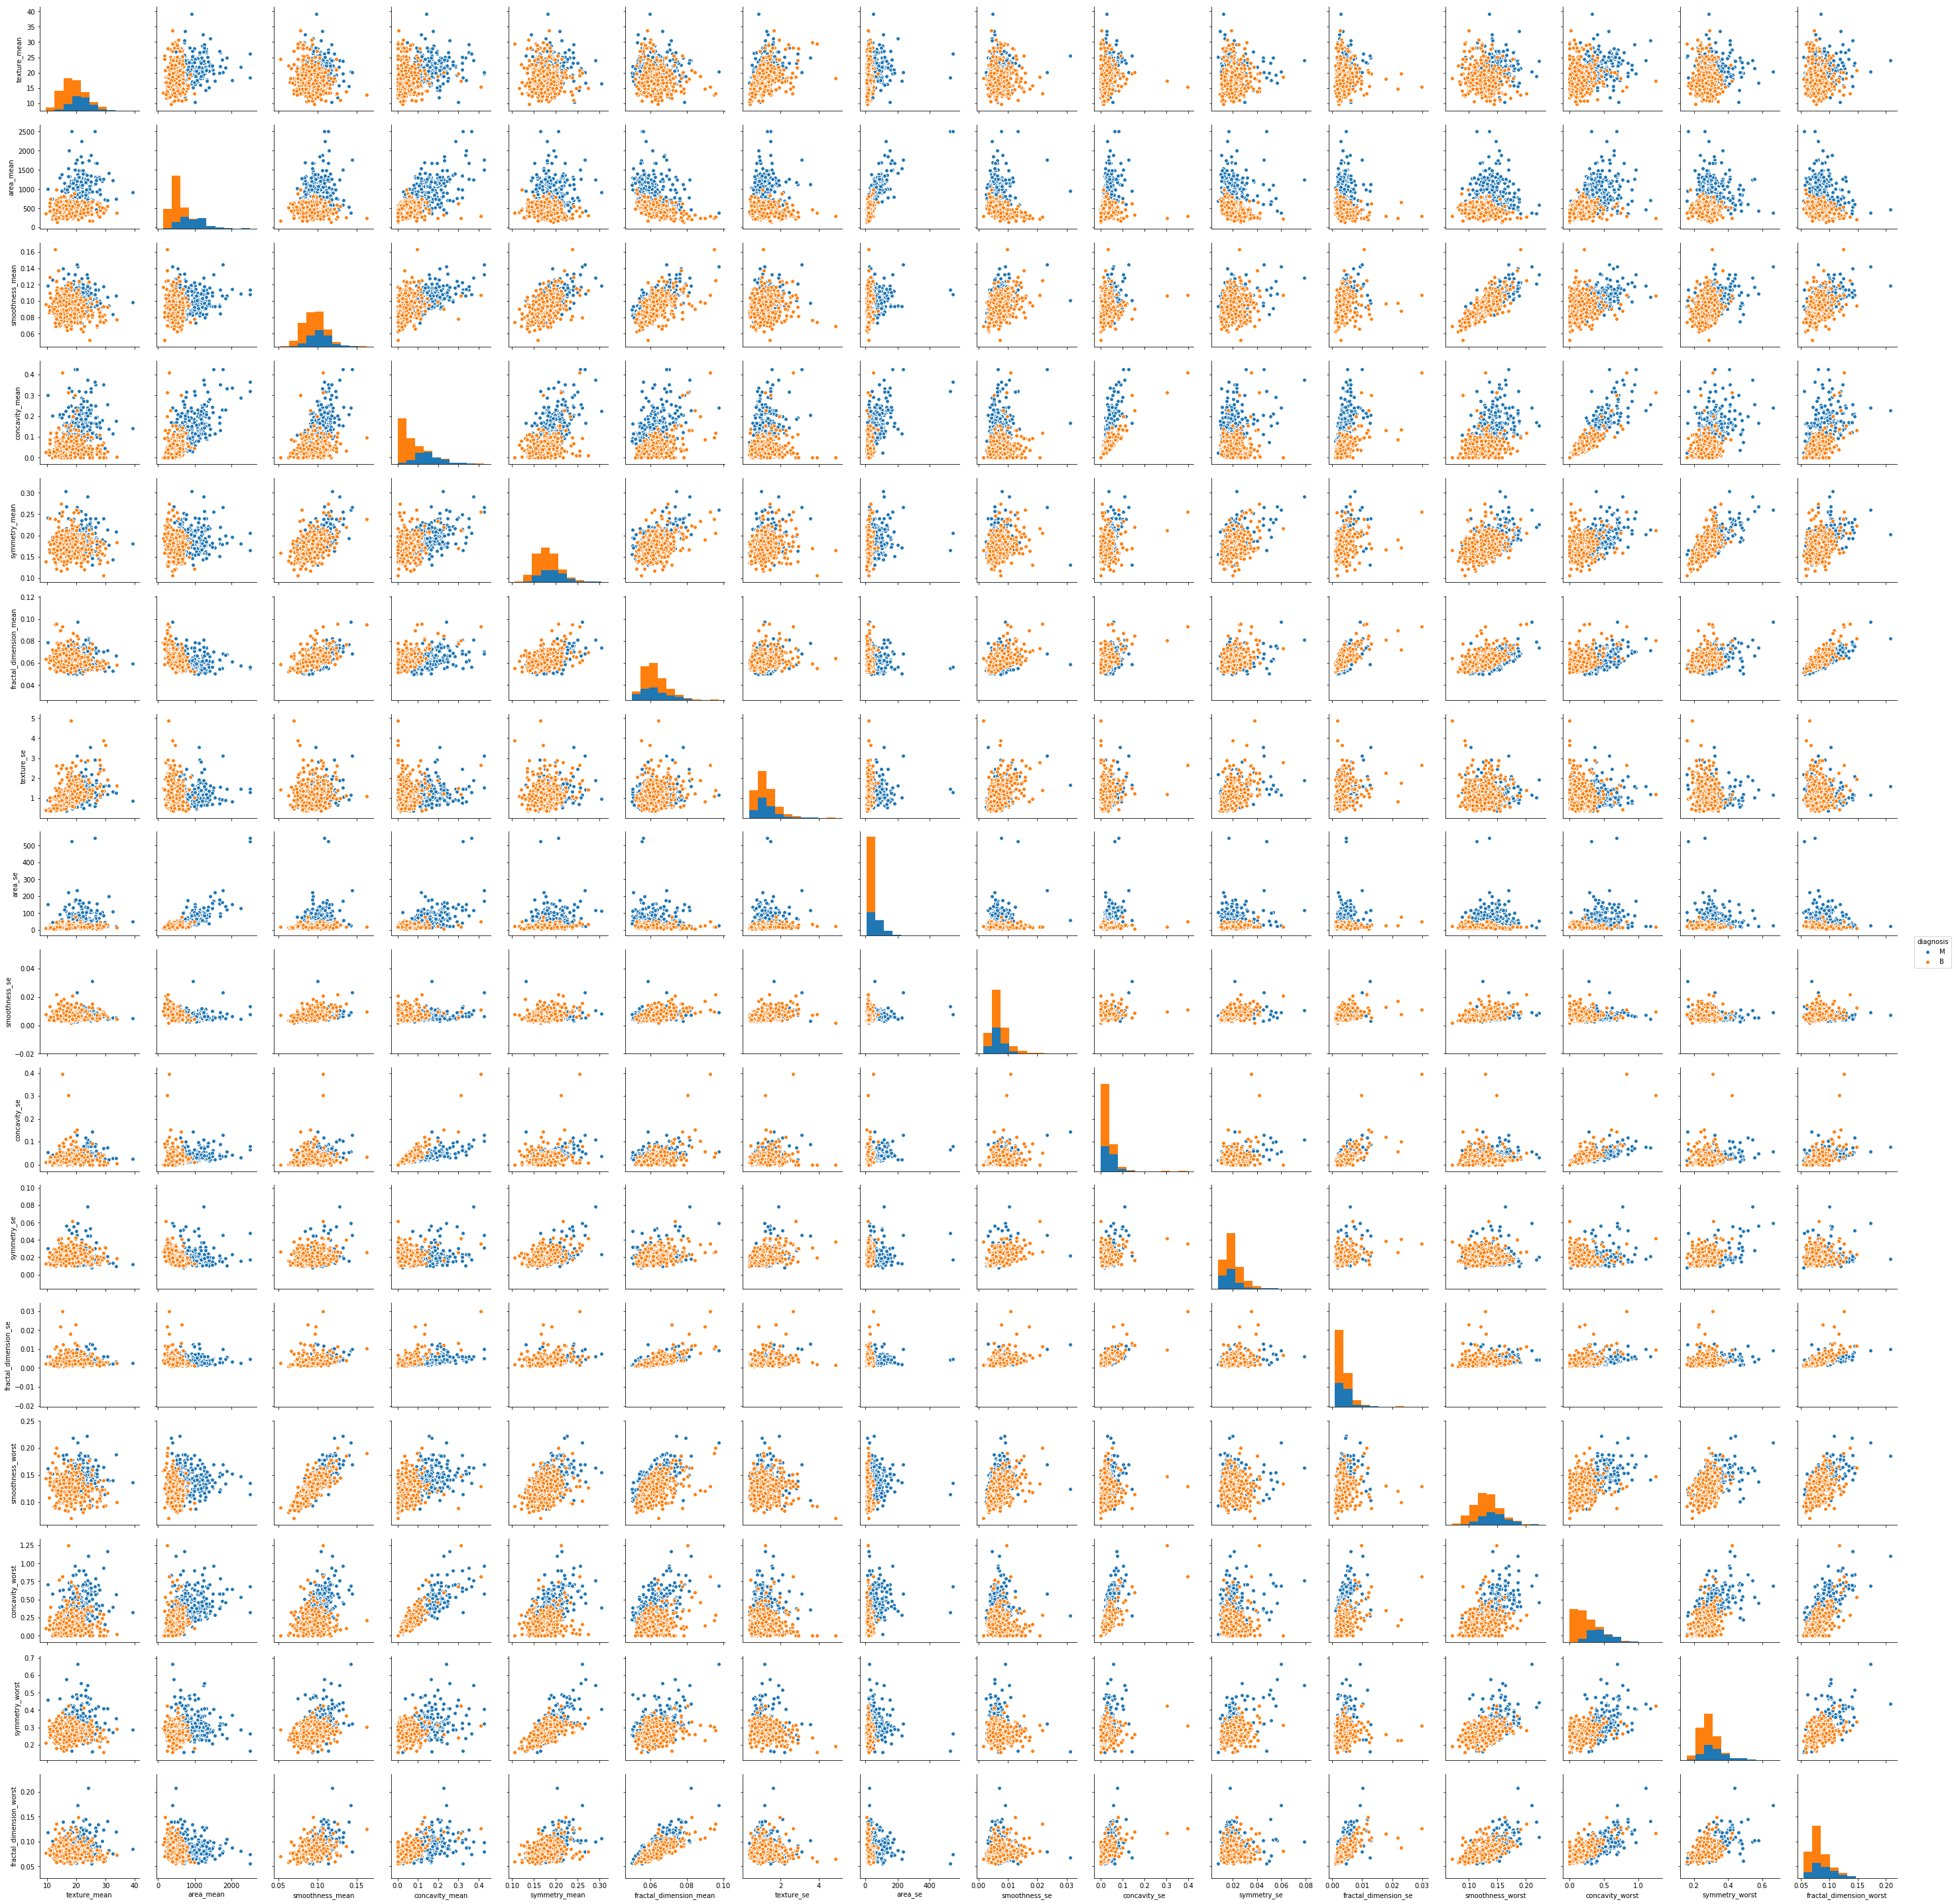

In [27]:
sns.pairplot(X,hue='diagnosis')

From the pairplot we see that the malignant and Benign data seem more or less seperately clustured hopefully this gives an indication that data would not be difficult to classify. We try using three different models SVM, RandoForest and Neural Network.

# Creating Models

Before running models, I will separate Target and standardaise the data

In [92]:
y=X.diagnosis #save the labels

In [93]:
X.drop(columns='diagnosis',inplace=True) #removing columns

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [94]:
xcopy=X.copy()

In [95]:
st=StandardScaler()

In [96]:
X=st.fit_transform(X)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((426, 16), (143, 16), (426,), (143,))

In [41]:
model_svm=SVC()

In [43]:
model_svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
accuracy_score(model_svm.predict(x_train),y_train) #  Train accuracy

0.9812206572769953

In [49]:
accuracy_score(model_svm.predict(x_test),y_test) # Test accuracy

0.9790209790209791

As I predicted data is quite easy to train, good accuracy could be found even without tuning

In [47]:
model_RF=RandomForestClassifier()

In [48]:
model_RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
accuracy_score(model_RF.predict(x_train),y_train)# Train accuracy

0.9953051643192489

In [51]:
accuracy_score(model_RF.predict(x_test),y_test) # Test accuracy

0.958041958041958

There is slight overfitting. Let's try using Neural Networks

# Keras Model

In [53]:
# Encode the catagorical result
labelEnc=LabelEncoder()
y_train=labelEnc.fit_transform(y_train)

In [54]:
y_test=labelEnc.fit_transform(y_test)

In [55]:
model_keras=Sequential()

In [56]:
model_keras.add(Dense(50,input_dim=x_train.shape[1],activation='relu')) # first hidden layer created  with 50 neurons
model_keras.add(Dropout(p=0.1)) # Adding dropout to prevent overfitting

model_keras.add(Dense(50,activation='relu')) # Second hidden layer
model_keras.add(Dropout(p=0.1))

model_keras.add(Dense(output_dim=1, activation='sigmoid'))



Providing a loss function and optimizing algorithm. Since this is a binary classification I am using sigmoid as output layer and Binary crossentropy. Optimization algorithm used is Adam.

In [57]:
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model_keras.fit(x_train,y_train, batch_size=100, nb_epoch=50)

Epoch 1/50
426/426 [==============================] - 2s 5ms/step - loss: 0.7777 - acc: 0.3779
Epoch 2/50
426/426 [==============================] - 0s 77us/step - loss: 0.6741 - acc: 0.5681
Epoch 3/50
426/426 [==============================] - 0s 82us/step - loss: 0.5844 - acc: 0.7700
Epoch 4/50
426/426 [==============================] - 0s 113us/step - loss: 0.5217 - acc: 0.8498
Epoch 5/50
426/426 [==============================] - 0s 77us/step - loss: 0.4719 - acc: 0.8920
Epoch 6/50
426/426 [==============================] - 0s 77us/step - loss: 0.4339 - acc: 0.9061
Epoch 7/50
426/426 [==============================] - 0s 85us/step - loss: 0.3838 - acc: 0.9085
Epoch 8/50
426/426 [==============================] - 0s 94us/step - loss: 0.3548 - acc: 0.8967
Epoch 9/50
426/426 [==============================] - 0s 70us/step - loss: 0.3193 - acc: 0.9108
Epoch 10/50
426/426 [==============================] - 0s 68us/step - loss: 0.2879 - acc: 0.9178
Epoch 11/50
426/426 [==================

In [64]:
y_pred=model_keras.predict(x_test) # predictinng for test data

In [68]:
y_pred=(y_pred > 0.5) # converting probabilties greater than .5 to True

In [69]:
accuracy_score(y_pred,y_test)

0.993006993006993

In [70]:
from sklearn.metrics import confusion_matrix

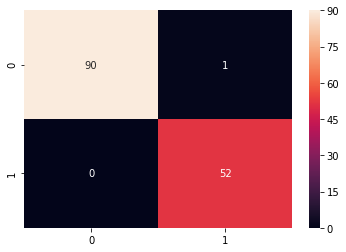

In [72]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

The model does not show overfitting. It might be as we saw from the pairplot that the data is not difficult to classify. It turns out true and we get a good accuracy for all the models.



# Decision Boundary for Models

In order to better understand our models I want to plot the decision boundry for two of our models i.e Random Forest and SVM.
Unfortunately it would be difficult to visualize for many dimensions so I would try to extract the two most important features. I would create new models and train them for just two of these features and try to visualize the Decision Boundry for these.

So the first step is to extract  the most important features by using Random Forest model.

In [75]:
model_RF.feature_importances_*100 # multiplying with 100 for readability

array([ 7.48791991, 20.84891242,  2.04175523, 11.56268646,  1.95869689,
        1.01830509,  0.86242704, 21.52508394,  1.05619352,  2.34108124,
        1.63818248,  0.9844572 ,  2.98302727, 19.96614502,  1.41136266,
        2.31376362])

In [98]:
xcopy.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

From the list we see 'area_se', 'area_mean' are the two most important features.

In [104]:
X[:,8].min(),X[:,8].max() # minimum and maximum of 'area_se'

(-1.7760649794257979, 8.029999267204188)

In [106]:
# creating a grid for 'area_se , 'area_mean'
xx1,xx2=np.meshgrid(np.arange(X[:,8].min(),X[:,8].max(),.1),np.arange(X[:,1].min(),X[:,1].max(),.1))

In [107]:
xx1.shape,xx2.shape

((68, 99), (68, 99))

# Random Forest

In [110]:
md_rf=RandomForestClassifier()

In [111]:
md_rf.fit(x_train[:,[1,8]],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
accuracy_score(md_rf.predict(x_test[:,[1,8]]),y_test)

0.9090909090909091

Luckily we see with just these two feaure the model does a good job on the test data. Let's see how how many cases it has actually failed to classify.

Text(0.5,1,'Confusion Matrix')

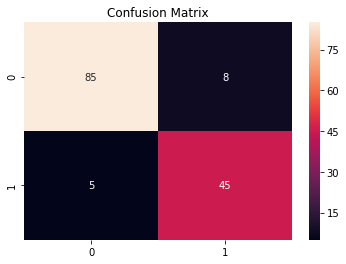

In [147]:
sns.heatmap(confusion_matrix(md_rf.predict(x_test[:,[1,8]]),y_test),annot=True)
plt.title('Confusion Matrix')

In [148]:
Z=md_rf.predict(np.c_[xx1.ravel(),xx2.ravel()]) # determinig the decision boundary

In [118]:
Z = Z.reshape(xx1.shape)

In [123]:
x_test_df=pd.DataFrame(x_test)

In [124]:
x_test_df['target']=y_test

In [129]:
x_test_df.loc[x_test_df.target==0].head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
0,-1.372888,-0.768161,1.426135,-0.532950,-0.148296,-0.294523,0.228873,-0.308180,1.409731,-0.332357,-0.574190,-0.133486,0.189871,-0.889933,-1.292212,-0.892517,0
1,-0.760869,-0.401556,0.294605,-0.342114,-0.297985,0.269684,-0.822358,-0.498714,0.561363,-0.283284,0.691080,0.352188,0.698367,-0.230706,0.775312,0.659126,0
3,-1.014519,-0.802575,-1.173538,-0.669674,0.698723,-0.047860,-0.337202,-0.630505,-0.581683,-0.486205,-0.210955,-0.701242,-1.002465,-0.560775,0.487347,-0.613775,0


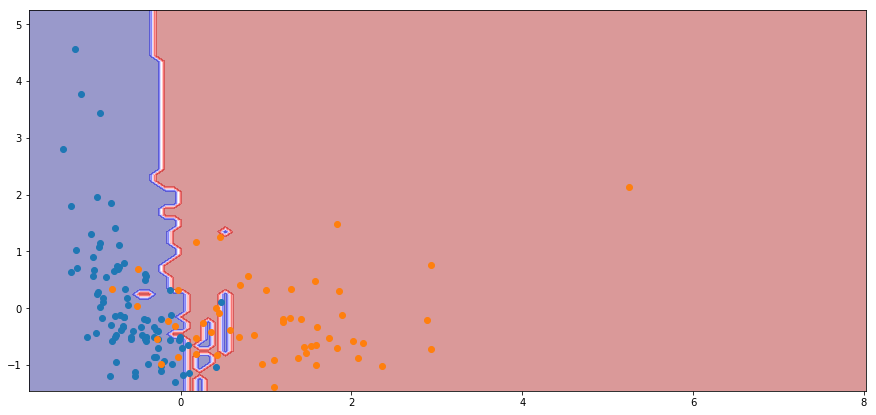

In [135]:
plt.figure(figsize=(15,7))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.seismic)
plt.scatter(x_test_df.loc[x_test_df.target==0].iloc[:,1],x_test_df.loc[x_test_df.target==0].iloc[:,8])
plt.scatter(x_test_df.loc[x_test_df.target==1].iloc[:,1],x_test_df.loc[x_test_df.target==1].iloc[:,8])

# Support Vector Machine

In [137]:
md_sv=SVC()

In [141]:
md_sv.fit(x_train[:,[1,8]],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
accuracy_score(md_sv.predict(x_test[:,[1,8]]),y_test)

0.9230769230769231

Slightly better than Random Forest

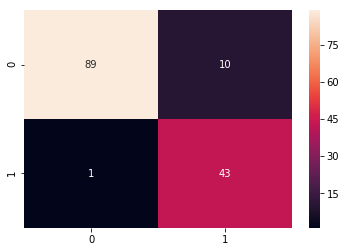

In [143]:
sns.heatmap(confusion_matrix(md_sv.predict(x_test[:,[1,8]]),y_test),annot=True)

In [144]:
Z2=md_sv.predict(np.c_[xx1.ravel(),xx2.ravel()])

In [145]:
Z2 = Z2.reshape(xx1.shape)

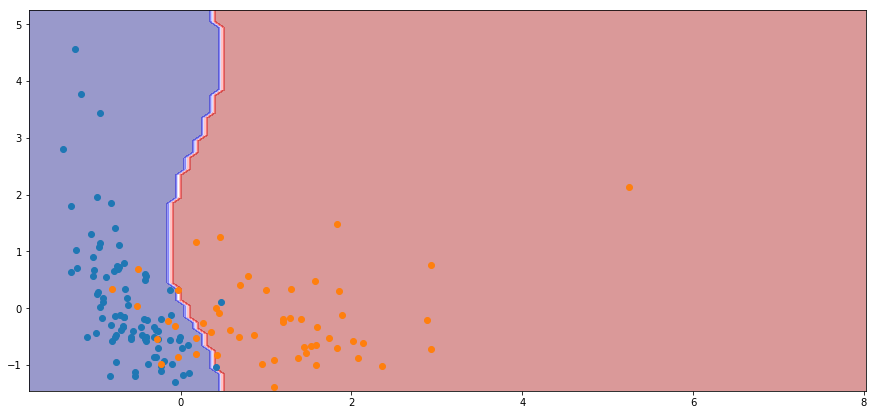

In [146]:
plt.figure(figsize=(15,7))
plt.contourf(xx1, xx2, Z2, alpha=0.4, cmap=plt.cm.seismic)
plt.scatter(x_test_df.loc[x_test_df.target==0].iloc[:,1],x_test_df.loc[x_test_df.target==0].iloc[:,8])
plt.scatter(x_test_df.loc[x_test_df.target==1].iloc[:,1],x_test_df.loc[x_test_df.target==1].iloc[:,8])

From the Decision boundry we see that SVM has generalised better than Random forest as the Decision boundry is much simpler.
We were lucky to have a data which was quite separable just by two features. Overall this excercise does well to make us understand the Data and properties of cells which causes Cancer.